## IMPORT FILES

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


## DATASET LOAD

In [4]:
# Replace 'your_dataset.xlsx' with the actual file name
file_path = 'cleaned_data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to verify the data
df.head()


Comments Like Prediction
0  অনেকের কমেন্ট পড়ে বুঝলাম এইটা একটা ঔষধি গুণসম্...   22   Negative
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...    9   Negative
2  আলহামদুলিল্লাহ পুরো গানটা শুনে কঠিন ধৈর্য্যের ...   74   Negative
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছে । শুধু এখন...  155   Negative
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...   65   Negative

## Preprocessing

In [6]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

## Stemming

In [8]:
# Import necessary libraries
import logging
from bangla_stemmer.stemmer import stemmer

# Suppress logs from the Bangla Stemmer library
logging.getLogger('bangla_stemmer').setLevel(logging.CRITICAL)

# Define the stemming function
def stem_text(text):
    stmr = stemmer.BanglaStemmer()  # Initialize the stemmer
    words = str(text).split()  # Split the text into words
    stemmed_words = stmr.stem(words)  # Perform stemming
    return ' '.join(stemmed_words)  # Join the stemmed words back into a single string

# Apply stemming to the 'Comments' column
df['stemmedComments'] = df['Comments'].apply(stem_text)

# Display the first few rows to verify the result
df.head()



applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
appl

Comments Like Prediction  \
0  অনেকের কমেন্ট পড়ে বুঝলাম এইটা একটা ঔষধি গুণসম্...   22   Negative   
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...    9   Negative   
2  আলহামদুলিল্লাহ পুরো গানটা শুনে কঠিন ধৈর্য্যের ...   74   Negative   
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছে । শুধু এখন...  155   Negative   
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...   65   Negative   

                                     stemmedComments  
0  অনেকের কমেন্ট পড়ে বুঝ এই এক ঔষধি গুণসম্পন্ন গা...  
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...  
2  আলহামদুলিল্লাহ পুরো গান শুনে কঠিন ধৈর্য্য পরীক...  
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছ । শুধু এখন ...  
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...

# Lemmatization

In [10]:
# Install the NLTK library (if not already installed)
# Uncomment the following line to install NLTK
!pip install nltk

# Import necessary modules
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

# Download WordNet data (if not already downloaded)
nltk.download('wordnet')
nltk.download('omw-1.4')  # Download multilingual WordNet support (optional)

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the lemmatization function
def lemmatize_text_wordnet(text):
    # Split the text into words, lemmatize each word, and rejoin
    words = str(text).split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the stemmed comments
df['lemmatizedComments'] = df['stemmedComments'].apply(lemmatize_text_wordnet)

# Display the first few rows to verify the result
df.head()



Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nafiz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nafiz\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Comments Like Prediction  \
0  অনেকের কমেন্ট পড়ে বুঝলাম এইটা একটা ঔষধি গুণসম্...   22   Negative   
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...    9   Negative   
2  আলহামদুলিল্লাহ পুরো গানটা শুনে কঠিন ধৈর্য্যের ...   74   Negative   
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছে । শুধু এখন...  155   Negative   
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...   65   Negative   

                                     stemmedComments  \
0  অনেকের কমেন্ট পড়ে বুঝ এই এক ঔষধি গুণসম্পন্ন গা...   
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...   
2  আলহামদুলিল্লাহ পুরো গান শুনে কঠিন ধৈর্য্য পরীক...   
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছ । শুধু এখন ...   
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...   

                                  lemmatizedComments  
0  অনেকের কমেন্ট পড়ে বুঝ এই এক ঔষধি গুণসম্পন্ন গা...  
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...  
2  আলহামদুলিল্লাহ পুরো গান শুনে কঠিন ধৈর্য্য পরীক...  
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছ । শুধু এখন ...  
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...

## Changing Labels to Numbers

In [12]:
# Find unique labels in the 'Prediction' column
unique_labels = df['Prediction'].unique()
print("Unique labels in 'Prediction' column:")
print(unique_labels)


Unique labels in 'Prediction' column:
['Negative' 'Positive']


In [13]:
# Create a mapping of labels to numbers
label_to_number = {label: idx for idx, label in enumerate(unique_labels)}

# Print the mapping
print("\nMapping of labels to numbers:")
print(label_to_number)

# Replace labels in the 'Prediction' column with corresponding numbers
df['PredictionNumeric'] = df['Prediction'].map(label_to_number)



Mapping of labels to numbers:
{'Negative': 0, 'Positive': 1}


In [14]:
# Display the first few rows to verify
print("\nDataFrame with numeric labels:")
df.head()



DataFrame with numeric labels:


Comments Like Prediction  \
0  অনেকের কমেন্ট পড়ে বুঝলাম এইটা একটা ঔষধি গুণসম্...   22   Negative   
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...    9   Negative   
2  আলহামদুলিল্লাহ পুরো গানটা শুনে কঠিন ধৈর্য্যের ...   74   Negative   
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছে । শুধু এখন...  155   Negative   
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...   65   Negative   

                                     stemmedComments  \
0  অনেকের কমেন্ট পড়ে বুঝ এই এক ঔষধি গুণসম্পন্ন গা...   
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...   
2  আলহামদুলিল্লাহ পুরো গান শুনে কঠিন ধৈর্য্য পরীক...   
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছ । শুধু এখন ...   
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...   

                                  lemmatizedComments  PredictionNumeric  
0  অনেকের কমেন্ট পড়ে বুঝ এই এক ঔষধি গুণসম্পন্ন গা...                  0  
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...                  0  
2  আলহামদুলিল্লাহ পুরো গান শুনে কঠিন ধৈর্য্য পরীক...                  0  
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছ । শুধু এখন ...                  0  
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...                  0

## Removing Null values

In [16]:
# Display the count of non-null values before dropping nulls
print("Non-null values before dropping:")
print(df.info())

# Drop rows with null values in the 'Comments' or 'Prediction' columns
df = df.dropna(subset=['lemmatizedComments', 'Prediction'])

# Display the count of non-null values after dropping nulls
print("\nNon-null values after dropping:")
print(df.info())

# Display the first few rows to verify
df.head()


Non-null values before dropping:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25037 entries, 0 to 25036
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Comments            25037 non-null  object
 1   Like                24958 non-null  object
 2   Prediction          25037 non-null  object
 3   stemmedComments     25037 non-null  object
 4   lemmatizedComments  25037 non-null  object
 5   PredictionNumeric   25037 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB
None

Non-null values after dropping:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25037 entries, 0 to 25036
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Comments            25037 non-null  object
 1   Like                24958 non-null  object
 2   Prediction          25037 non-null  object
 3   stemmedComments     25037 non-null

Comments Like Prediction  \
0  অনেকের কমেন্ট পড়ে বুঝলাম এইটা একটা ঔষধি গুণসম্...   22   Negative   
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...    9   Negative   
2  আলহামদুলিল্লাহ পুরো গানটা শুনে কঠিন ধৈর্য্যের ...   74   Negative   
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছে । শুধু এখন...  155   Negative   
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...   65   Negative   

                                     stemmedComments  \
0  অনেকের কমেন্ট পড়ে বুঝ এই এক ঔষধি গুণসম্পন্ন গা...   
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...   
2  আলহামদুলিল্লাহ পুরো গান শুনে কঠিন ধৈর্য্য পরীক...   
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছ । শুধু এখন ...   
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...   

                                  lemmatizedComments  PredictionNumeric  
0  অনেকের কমেন্ট পড়ে বুঝ এই এক ঔষধি গুণসম্পন্ন গা...                  0  
1  রাত বাজে ১২ তা ঘুম আস্তেছিল না ,শুধু ১ বার গান...                  0  
2  আলহামদুলিল্লাহ পুরো গান শুনে কঠিন ধৈর্য্য পরীক...                  0  
3  জ্বর হইছিলো, গান শুনে জ্বর চলে গেছ । শুধু এখন ...                  0  
4  কি কণ্ঠ! শুনে শিহরিত হয়ে গেলাম!! আলহামদুলিল্ল...                  0

## Feature Extraction with TFIDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF transformer
max_features_values = [10000]  # Different max_features configurations
tfidf_transformers = {features: TfidfVectorizer(ngram_range=(1, 3), 
                                                lowercase=True, 
                                                max_features=features) 
                      for features in max_features_values}

# Apply TF-IDF transformation for each configuration
tfidf_results = {}

for features, transformer in tfidf_transformers.items():
    print(f"\nApplying TF-IDF with max_features={features}...")
    # Fit-transform on the entire dataset
    tfidf_matrix = transformer.fit_transform(df['lemmatizedComments'].values)
    tfidf_results[features] = tfidf_matrix  # Store the result
    
    # Print a summary
    print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Access one of the TF-IDF matrices
# Example: For max_features=10000
tfidf_10000 = tfidf_results[10000]

# Display the TF-IDF feature names (optional, only for smaller feature sizes)
print("\nSample TF-IDF feature names (for max_features=10000):")
print(tfidf_transformers[10000].get_feature_names_out()[:10])



Applying TF-IDF with max_features=10000...
TF-IDF matrix shape: (25037, 10000)

Sample TF-IDF feature names (for max_features=10000):
['100' '2022' '2023' '23' '23 আব' '23 আব নল' '38' '51' '51 এর' '51 এর এল']


## DATASET Splitting (80% for train, 20% to test)

In [20]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X = df['lemmatizedComments']  # Features: Comments
y = df['PredictionNumeric']  # Target: Numeric Prediction

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits to verify
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 20029
Testing set size: 5008


# Applying SVM Algorithm

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = df['lemmatizedComments']
y = df['PredictionNumeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply TF-IDF and train Logistic Regression in one step
tfidf_transformer = TfidfVectorizer(ngram_range=(1, 3), lowercase=True, max_features=10000)
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)

# Train the Logistic Regression model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6785143769968051


In [23]:
print("Unique labels in y_test:", set(y_test))
print("Unique labels in y_pred:", set(y_pred))


Unique labels in y_test: {0, 1}
Unique labels in y_pred: {0, 1}


## Confusion Matrix

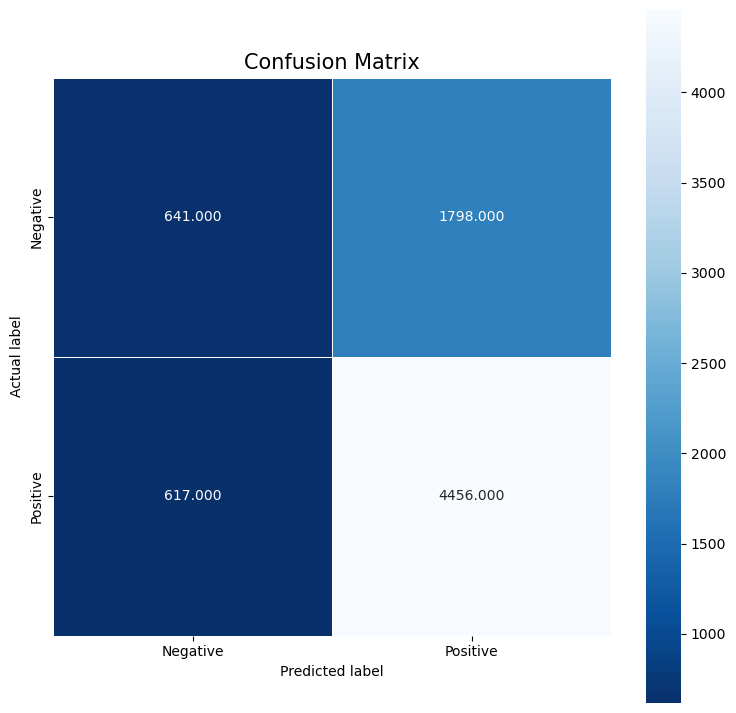

In [25]:
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the labels based on the unique classes in your data
labels = ['Negative', 'Positive']  # These correspond to classes 0, 2, and 3

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot Confusion Matrix as a heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(cm_df, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.show()


## Classification Report

In [27]:
from sklearn.metrics import classification_report

# Create classification report using y_test and y_pred
report = pd.DataFrame(classification_report(y_test, y_pred, target_names=labels, output_dict=True)).transpose()

# Round precision, recall, and f1-score to 2 decimal places
report[['precision', 'recall', 'f1-score']] = report[['precision', 'recall', 'f1-score']].apply(lambda x: round(x * 100, 2))

# Display the report
display(report)


precision  recall  f1-score      support
Negative          50.95   26.28     34.68  2439.000000
Positive          71.25   87.84     78.68  5073.000000
accuracy          67.85   67.85     67.85     0.678514
macro avg         61.10   57.06     56.68  7512.000000
weighted avg      64.66   67.85     64.39  7512.000000

## ROC curve

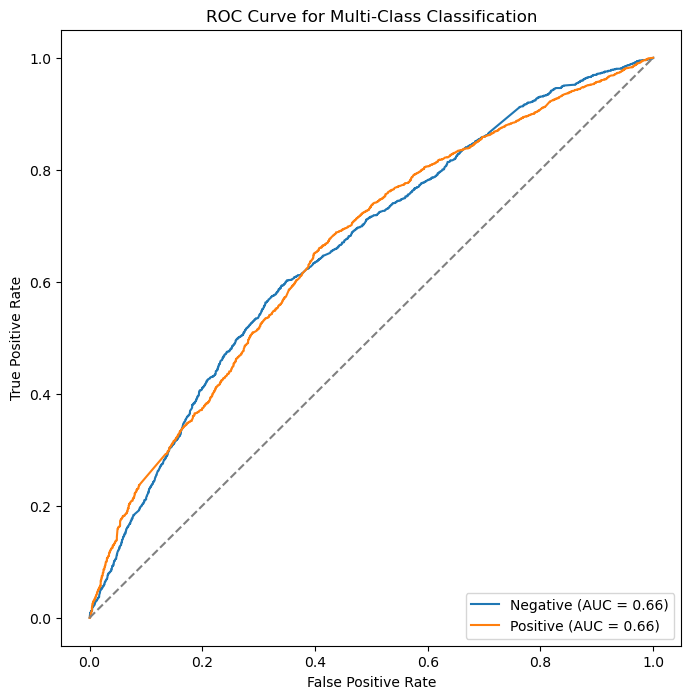

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 3])  # Use only the classes present in the data
y_pred_prob = svm_model.predict_proba(X_test_tfidf)  # Probability estimates for each class

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(labels)):  # Adjust this loop according to the number of classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random predictions
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


## Precision Recall Curve

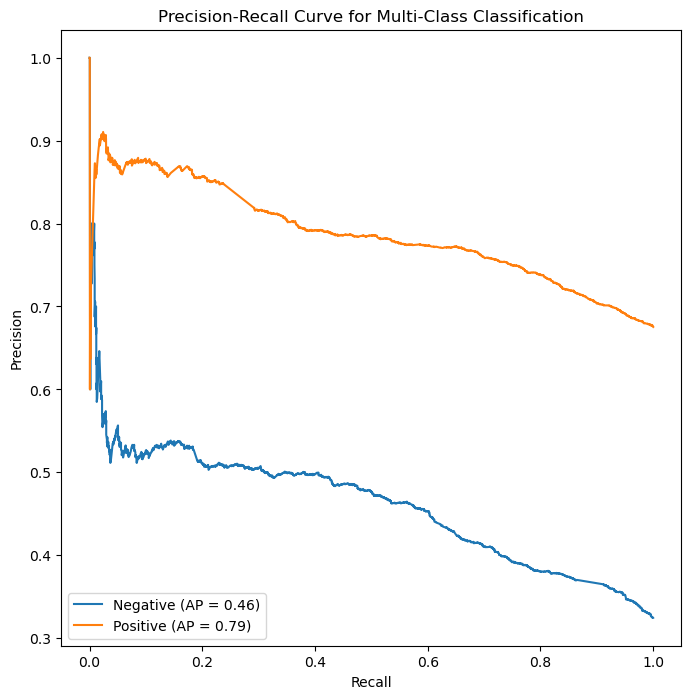

In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Calculate Precision-Recall curve and Average Precision Score for each class
precision, recall, average_precision = {}, {}, {}
for i in range(len(labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 8))
for i in range(len(labels)):
    plt.plot(recall[i], precision[i], label=f'{labels[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class Classification')
plt.legend(loc='lower left')
plt.show()
